# Intro to AI - Coursework
Joshua Luke Boddy - aczc760

Saeed Almansoori - 

## Importing Required Libraries

The libraries below are required for the whole project and are imported at the start to maintain tidiness in the code, as well as make them usable throughout the notebook in later cells

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

## Data Preparation

Taking a CSV file as our data set, the data needs to be converted across from CSV to something program readable as well as formatting the data into a readable format for our model (undecided).

Columns needing data conversion:
- Manufacturer Name -> Categorical
- Model Name -> Categorical
- Transmission -> Categorical
- Color -> Categorical
- Engine Fuel -> Categorical
- Engine Has Gas -> Boolean
- Engine Type -> Categorical
- Body Type -> Categorical
- Has Warranty -> Boolean
- State -> Categorical
- Drivetrain -> Categorical

Extra Useable Columns
- Odometer Value -> Int
- Year Produced -> Int
- Engine Capacity -> Float

Data Labels
- Price USD -> Float

In [181]:
columnList = [
    'manufacturer_name',
    'model_name',
    'transmission',
    'color',
    'engine_fuel',
    'engine_has_gas',
    'engine_type',
    'body_type',
    'has_warranty',
    'state',
    'drivetrain',
    'odometer_value',
    'year_produced',
    'engine_capacity',
    'price_usd'
]

data = pd.read_csv('./cars.csv', usecols=columnList)

In [182]:
# Convert From Object
def convertFromObject(column):
    # This one liner takes a categorical column
    # and assigns a value to each value in the column
    # then returns the new column as a list of ints
    return column.astype('category').cat.codes

# Convert From Boolean
def convertFromBoolean(column):
    # Simply convert from boolean to integer
    # where 0 is False and 1 is True
    return column.astype(int)

# Prepare Column function for each column
# This contains the appropriate function for
# each column in the dataset to run by
# checking their data types
def prepare_column(dtype, column):
    if dtype == np.object:
        return convertFromObject(column)
    elif dtype == np.bool:
        return convertFromBoolean(column)
    elif dtype == np.int or dtype == np.float:
        return column
    else:
        raise Exception("Data Type for Current Column %s not specified" % (column.dtype))

# The overall preparation function
# This will prepare every column in the dataset
# to be read by the neural network
def prepare_dataset(dataset):
    for column in dataset.columns:
        dataset[column] = prepare_column(dataset[column].dtype, dataset[column])
    return dataset

In [183]:
dataset = prepare_dataset(data).dropna()

In [184]:
class MultivarRegressor():
    def __init__(self, dataset):
        self.dataset = dataset
        self.y = dataset.pop('price_usd')
        self.X = self.normalise(dataset)
        self.split = round(len(self.X) * 0.7)
        self.Xtest = self.X.iloc[self.split:, :]
        self.Ytest = self.y.iloc[self.split:]
        self.X = self.X.iloc[:self.split, :]
        self.y = self.y.iloc[:self.split]
        self.theta = np.array([0] * len(self.X.columns))
        self.m = len(self.X)
    
    def computeCost(self):
        y1 = self.hypothesis(self.theta, self.X)
        y1 = np.sum(y1, axis=1)
        return sum(np.sqrt((y1 -self.y)**2))/(2*self.m)
    
    def gradientDescent(self, alpha, i, print_thresh):
        J = []
        k = 0
        while k < i:        
            y1 = self.hypothesis(self.theta, self.X)
            y1 = np.sum(y1, axis=1)
            for c in range(0, len(self.X.columns)):
                self.theta[c] = self.theta[c] - alpha * (sum((y1-self.y)*self.X.iloc[:,c])/self.m)
            j = self.computeCost()
            J.append(j)
            k += 1
            if(k % print_thresh == 0):
                print("Iteration: %s" % (str(k)))
        return J, j, self.theta
    
    def train(self, alpha, i, print_thresh=100):
        J, j, self.theta = self.gradientDescent(alpha, i, print_thresh)
        self.plotError(i, J)
    
    # R^2 Analysis to Determine Model Accuracy
    def test(self):
        print(x for x in self.Xtest.iterrows())
        yhats = [self.classify(self.Xtest.iloc[i, :]) for i in range(len(self.Xtest))]
        ybar = np.sum(self.Ytest) / len(self.Ytest)
        ssreg = np.sum([(yhat-ybar)**2 for yhat in yhats])   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        sstot = np.sum([(y - ybar)**2 for y in self.Ytest])
        return "R-Squared: " + str((1 - abs(ssreg / sstot)) * 100)
    
    def classify(self, X):
        y_hat = self.hypothesis(self.theta, X)
        y_hat = np.sum(y_hat)
        return np.round(y_hat, decimals=2)
    
    def plotError(self, i, J):
        plt.figure()
        plt.scatter(x=list(range(0, i)), y=J)
        plt.show()
    
    @staticmethod
    def normalise(X):
        for column in X.columns:
            X[column] = X[column] / np.max(X[column])
        return X
    
    @staticmethod
    def hypothesis(theta, X):
        return theta * X

In [185]:
carsRegressor = MultivarRegressor(dataset)

Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000


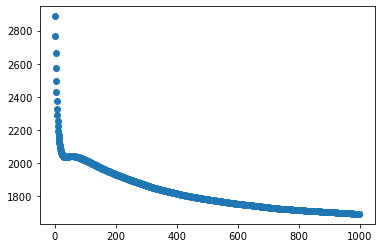

In [186]:
carsRegressor.train(0.01, 1000, print_thresh=100)

In [187]:
print(carsRegressor.test())

<generator object MultivarRegressor.test.<locals>.<genexpr> at 0x7fc14fb03970>


TypeError: can only concatenate str (not "numpy.float64") to str